In [59]:
# Import the machine learning libraries.
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [60]:
# Load the dataset.
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [61]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


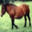

In [62]:
from keras.preprocessing.image import array_to_img
pic = array_to_img(X_train[7])
display(pic)

In [63]:
# Define the labels of the dataset.
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

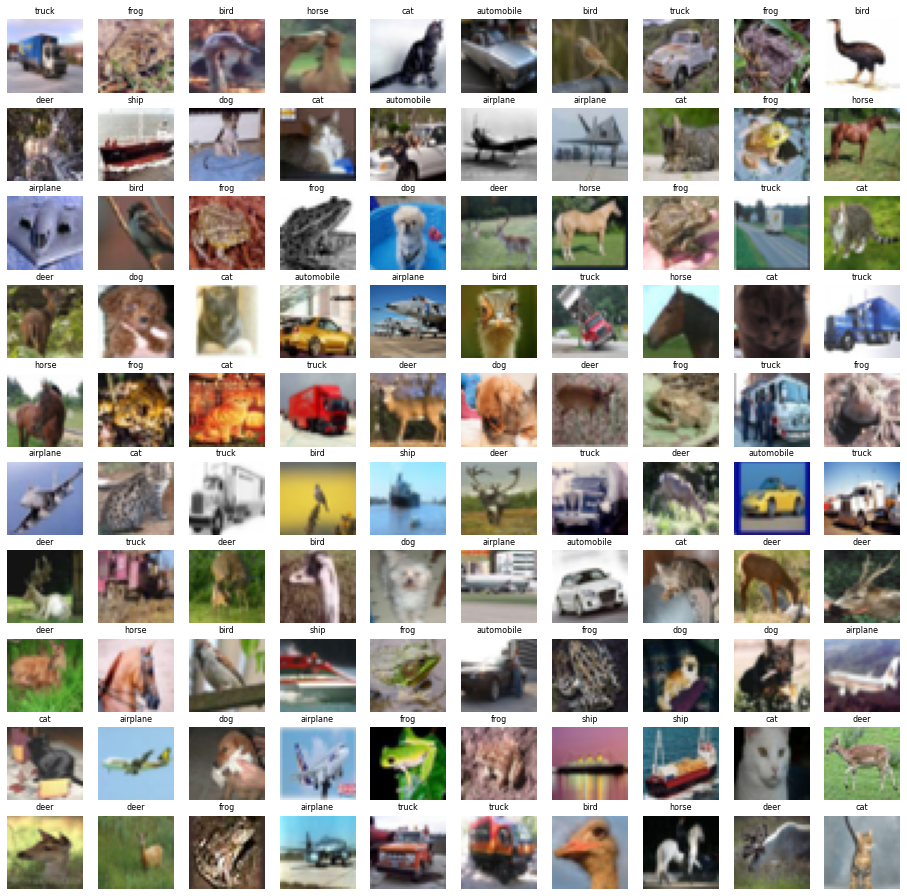

In [64]:
fig, axes = plt.subplots(10, 10, figsize = (16,16))
axes = axes.ravel()

n_train = len(X_train)
for i in np.arange(0, 10*10):
    index = np.random.randint(0, n_train)   
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [65]:
# Scale the data.
X_train = X_train / 255
X_test = X_test / 255

In [66]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [68]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)       

In [70]:
# Early Stopping.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [71]:
# Data Augmentations.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

In [72]:
r = model.fit(train_generator, 
              epochs=200,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
              verbose=2,
              # callbacks=[early_stop] # Uncomment for early stopping.
             )

Epoch 1/200
1562/1562 - 24s - loss: 1.5463 - accuracy: 0.4491 - val_loss: 1.3817 - val_accuracy: 0.5254
Epoch 2/200
1562/1562 - 24s - loss: 1.1279 - accuracy: 0.6021 - val_loss: 1.2286 - val_accuracy: 0.6003
Epoch 3/200
1562/1562 - 24s - loss: 0.9730 - accuracy: 0.6617 - val_loss: 0.8376 - val_accuracy: 0.7156
Epoch 4/200
1562/1562 - 24s - loss: 0.8756 - accuracy: 0.6964 - val_loss: 0.7565 - val_accuracy: 0.7447
Epoch 5/200
1562/1562 - 24s - loss: 0.8089 - accuracy: 0.7236 - val_loss: 0.7535 - val_accuracy: 0.7499
Epoch 6/200
1562/1562 - 24s - loss: 0.7490 - accuracy: 0.7437 - val_loss: 0.7527 - val_accuracy: 0.7442
Epoch 7/200
1562/1562 - 24s - loss: 0.7045 - accuracy: 0.7610 - val_loss: 0.6873 - val_accuracy: 0.7688
Epoch 8/200
1562/1562 - 24s - loss: 0.6713 - accuracy: 0.7699 - val_loss: 0.6200 - val_accuracy: 0.7912
Epoch 9/200
1562/1562 - 24s - loss: 0.6430 - accuracy: 0.7820 - val_loss: 0.7753 - val_accuracy: 0.7483
Epoch 10/200
1562/1562 - 24s - loss: 0.6081 - accuracy: 0.7905 -

Text(0.5, 1.0, 'Accuracy evolution')

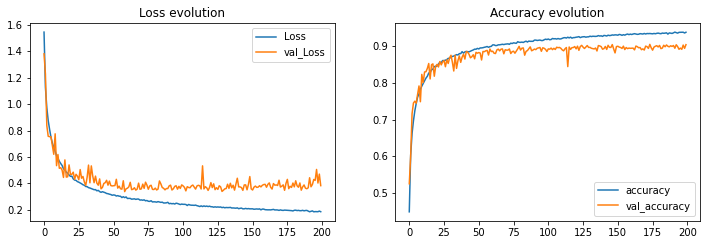

In [73]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [74]:
evaluation = model.evaluate(X_test, y_cat_test)
print('Test accuracy:', evaluation[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.3823 - accuracy: 0.9034
Test accuracy: 90.34000039100647


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1000
           1       0.93      0.97      0.95      1000
           2       0.89      0.86      0.87      1000
           3       0.82      0.78      0.80      1000
           4       0.90      0.89      0.90      1000
           5       0.88      0.84      0.86      1000
           6       0.91      0.95      0.93      1000
           7       0.95      0.93      0.94      1000
           8       0.94      0.95      0.95      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



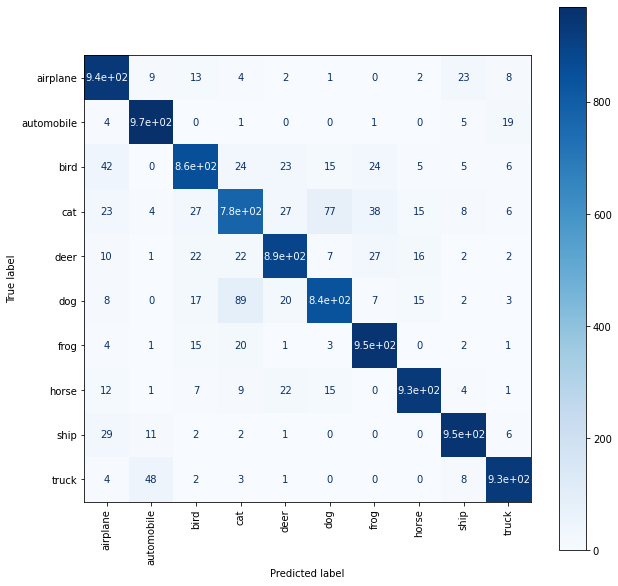

In [77]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='Blues')
#plt.show()

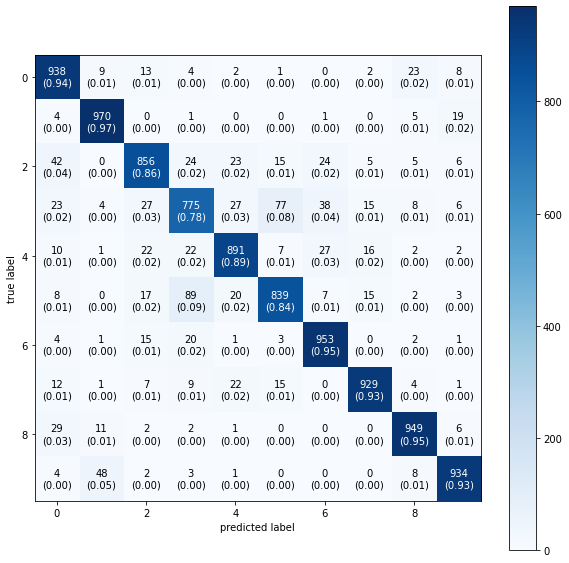

In [78]:
import sklearn.metrics as metrics
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      figsize=(10,10))
plt.show()